# Title: Using Regression Analysis to Predict the Performance of a Student

### Introduction

A student's performance is not only influenced by how hard they work; it can be affected by many factors, including school quality, relationships, health conditions, and so on. A study, conducted by Gutman, L. M., Sameroff, A. J., & Cole, R. (2003), shows that students are likely to perform better if they are older and have less absence. Apart from that, high dropout rates in high school are associated with their confidence at the beginnning of courses, which might depends on the performance in Midterm 1 and 2. In this project, we are trying to explore how to effectively predict their final performance based on their past performance. 

Using a dataset made by Paulo Cortez, we are able to answer the question above. The dataset contains data collected using school reports and questionnaires from two Portuguese secondary schools, and includes the first period, second period, and final grades of numerous students. It also tracks various social and health related information, ranging from family situations to alcohol consumption. Since the original dataset includes too many variables to reasonably consider, the variables we use has been filtered and narrowed down to a manageable amount. In this project, we are only interested in predicting a student's math performance, and predicators we chose are age, absence rates, and the grades from first and second periods Because the grades from first and second periods are the most direct indications for student's past performance, which highly depends on student's direct engagement and addentance. Besides, age might play a big social role in influencing their past performance.

### Methods

Of the thirty-two factors and single output target, we will use four factors to predict the final grade.

The factors used are as follows:

* Age (from 15 to 22)
* Number of absences (from 0 to 93)
* First period grade (from 0 to 20)
* Second period grade (from 0 to 20)
* Final grade (from 0 to 20)

From the age, absences, and first and second period grades, we expect to use our data analysis skills with R to predict the final math grade of a secondary school student.

We will use the `ggplot2` library to create a clear visualization of our results.

In [4]:
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

In [5]:
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip", temp)
data <- read_delim(unz(temp, "student-mat.csv"), delim = ";") %>% 
        select(age, absences, G1, G2, G3)
unlink(temp)

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



Here we create a ggpairs plot to visualize the relationships between variables and their respective correlations.

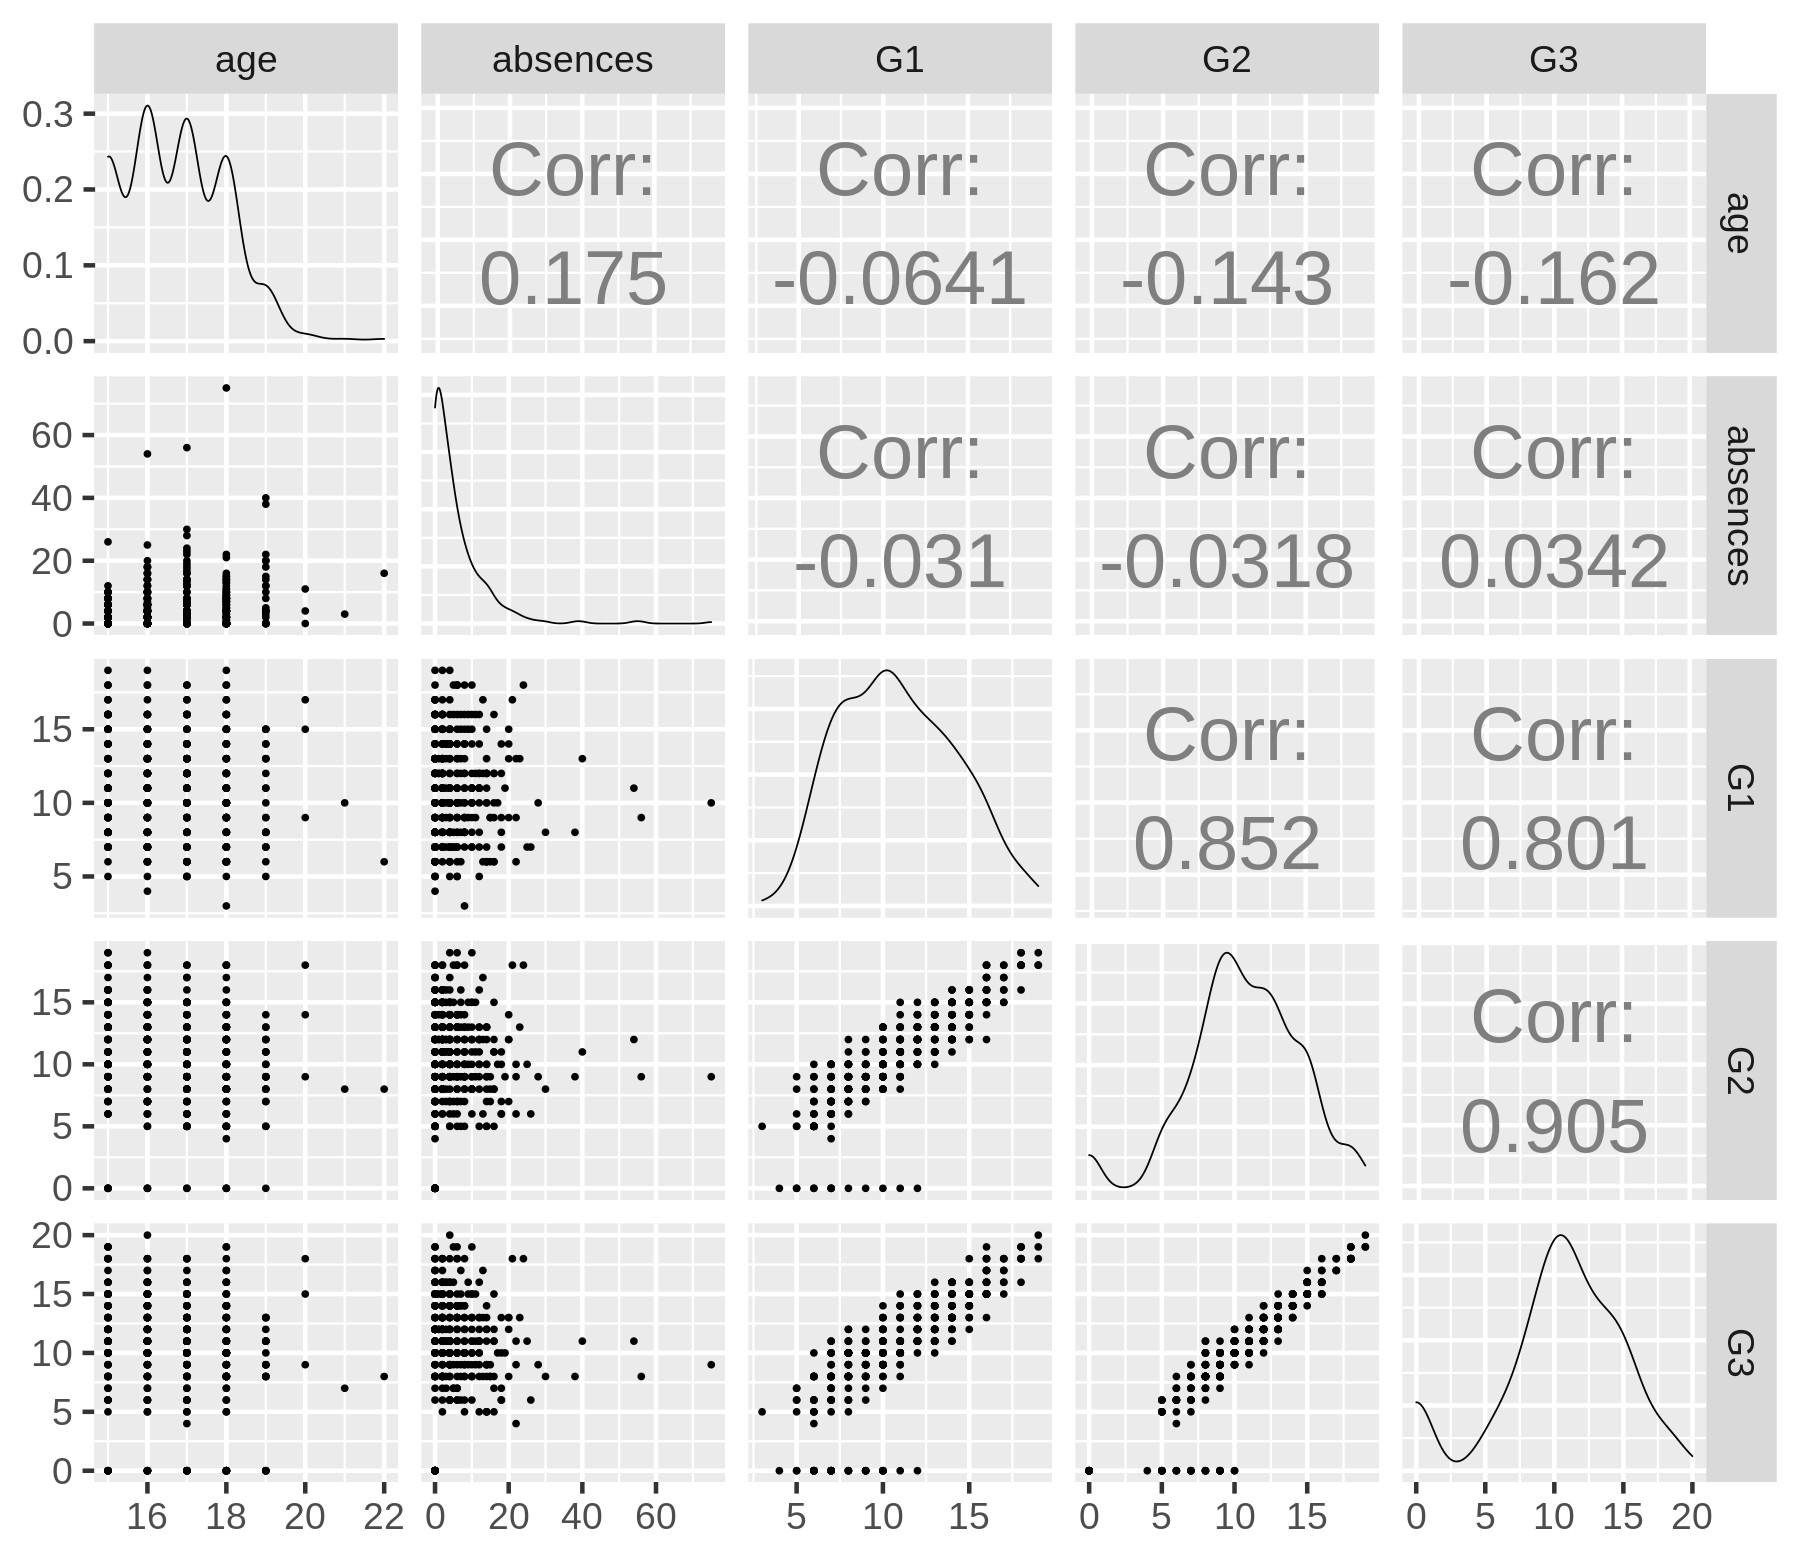

In [6]:
# create ggpairs plot
options(repr.plot.width = 15,repr.plot.height=13)
plot_pairs <- data %>%
  select(age, absences, G1, G2, G3) %>%
  ggpairs(upper = list(continuous = wrap("cor", size = 16))) + 
  theme_grey(base_size = 28)
plot_pairs

In [7]:
set.seed(123)
# splitting data into training data/testing data
data_split <- initial_split(data, prop = 0.75, strata = G3)
training_data <- training(data_split)
testing_data <- testing(data_split)

training_data
testing_data

age,absences,G1,G2,G3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,6,5,6,6
17,4,5,5,6
15,10,7,8,10
⋮,⋮,⋮,⋮,⋮
21,3,10,8,7
18,0,11,12,10
19,5,8,9,9


age,absences,G1,G2,G3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16,6,13,14,14
16,4,8,10,10
16,2,15,15,16
⋮,⋮,⋮,⋮,⋮
18,14,6,5,5
19,0,7,5,0
20,11,9,9,9


Here we create scatterplots for each quantitative predictor versus our target variable `G3`.

In [6]:
# creating scatterplot for age vs. G3
age_scatter <- ggplot(training_data, aes(x = age, y = G3)) +
    geom_point(color = "salmon3") +
    labs(x = "Student Age", y = "Third Period Grade (0-20 scale)") +
    geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black") + 
    theme(text = element_text(size = 13)) +
    scale_x_continuous(breaks = seq(15, 22, by = 1)) # adjusting the x-axis

# creating scatterplot for absences vs. G3
absences_scatter <- ggplot(training_data, aes(x = absences, y = G3)) +
    geom_point(color = "orchid3") +
    labs(x = "Number of School Absences", y = "Third Period Grade (0-20 scale)") +
    geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black") +
    theme(text = element_text(size = 13)) +
    scale_x_continuous(breaks = seq(0, 80, by = 20)) # adjusting the x-axis

# creating scatterplot for G1 vs. G3
G1_scatter <- ggplot(training_data, aes(x = G1, y = G3)) +
    geom_point(color = "seagreen") +
    labs(x = "First Period Grade (0-20 scale)", y = "Third Period Grade (0-20 scale)") +
    geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black") + 
    theme(text = element_text(size = 13)) +
    scale_x_continuous(breaks = seq(0, 20, by = 5)) # adjusting the x-axis

# creating scatterplot for G2 vs. G3
G2_scatter <- ggplot(training_data, aes(x = G2, y = G3)) +
    geom_point(color = "royalblue") +
    labs(x = "Second Period Grade (0-20 scale)", y = "Third Period Grade (0-20 scale)") +
    geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "black") + 
    theme(text = element_text(size = 13)) +
    scale_x_continuous(breaks = seq(0, 20, by = 5)) # adjusting the x-axis

Here we create histograms for each quantitative predictor so that we can visualize their univariate distributions.

In [7]:
# Creating histograms for predictors

# histogram for distribution of age
age_hist <- training_data %>%
    ggplot(aes(x=age)) + 
    geom_histogram(binwidth=1, fill = "salmon3") +
    labs(x = "Student Age", y = "Frequency" ) +
    theme(text = element_text(size = 13)) +
    scale_x_continuous(breaks = seq(15, 22, by = 1)) # adjusting the x-axis

# histogram for distribution of absences
absences_hist <- training_data %>%
    ggplot(aes(x=absences)) + 
    geom_histogram(binwidth=5, fill = "orchid3") +
    labs(x = "Number of School Absences", y = "Frequency" ) +
    theme(text = element_text(size = 13)) +
    scale_x_continuous(breaks = seq(0, 80, by = 20)) # adjusting the x-axis

# histogram for distribution of G1
G1_hist <- training_data %>%
    ggplot(aes(x=G1)) + 
    geom_histogram(binwidth=1, fill = "seagreen") +
    labs(x = "First Period Grade (0-20 scale)", y = "Frequency" ) +
    theme(text = element_text(size = 13)) +
    scale_x_continuous(breaks = seq(0, 20, by = 5)) # adjusting the x-axis

# histogram for distribution of G2
G2_hist <- training_data %>%
    ggplot(aes(x=G2)) + 
    geom_histogram(binwidth=1, fill = "royalblue") + 
    labs(x = "Second Period Grade (0-20 scale)", y = "Frequency" ) +
    theme(text = element_text(size = 13)) +
    scale_x_continuous(breaks = seq(0, 20, by = 5)) # adjusting the x-axis

We now display the scatterplots and histograms created above, color coordinated by the predictor being displayed.


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: grid



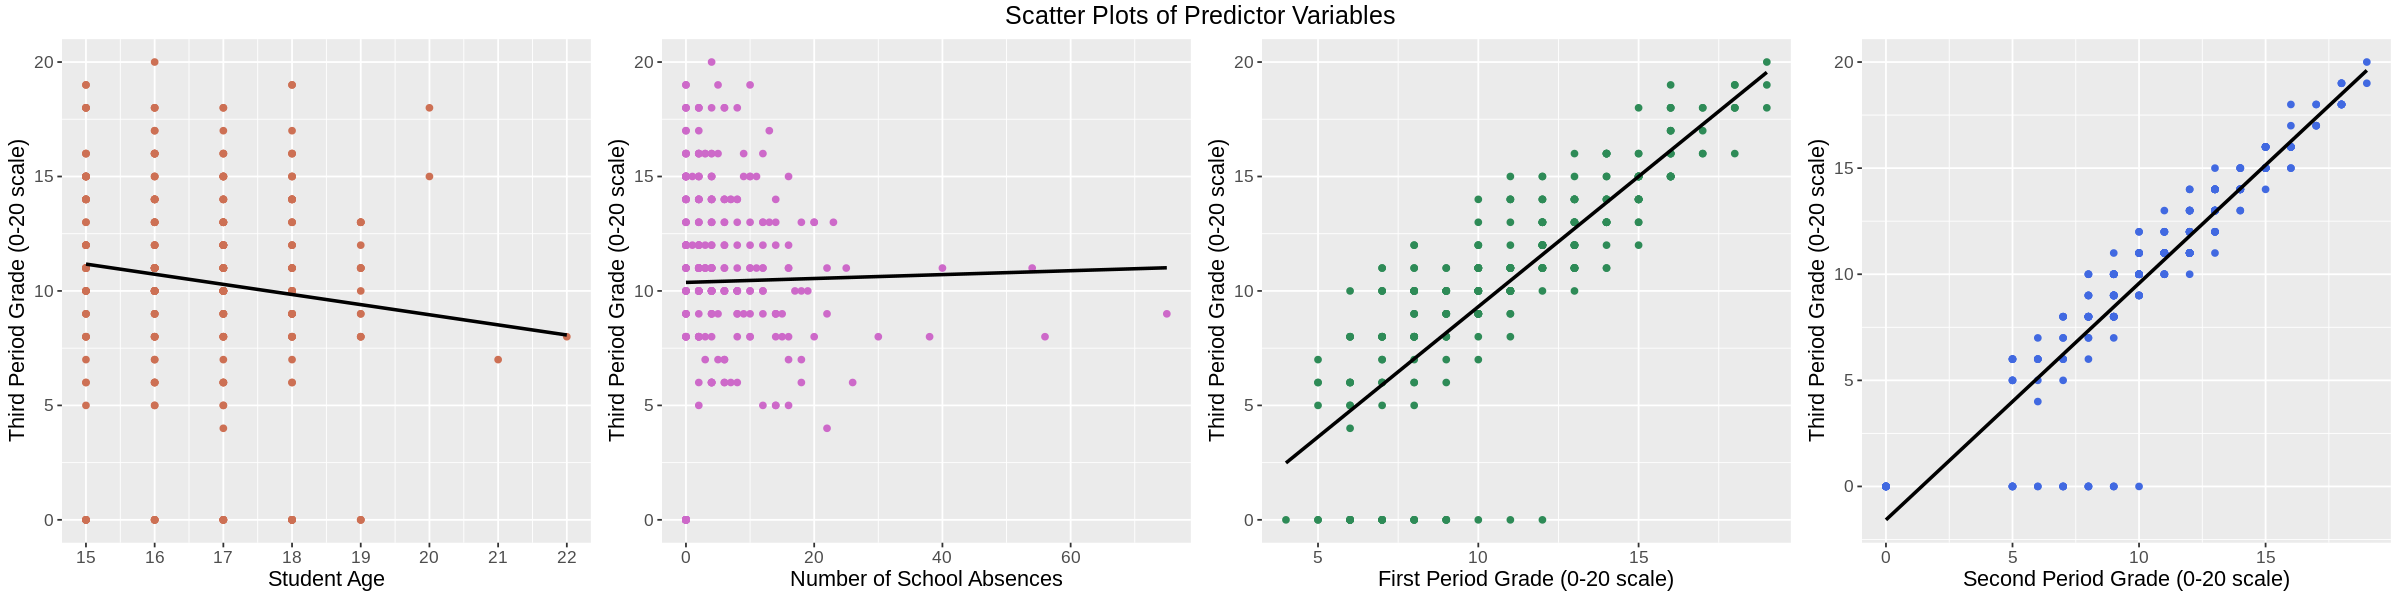

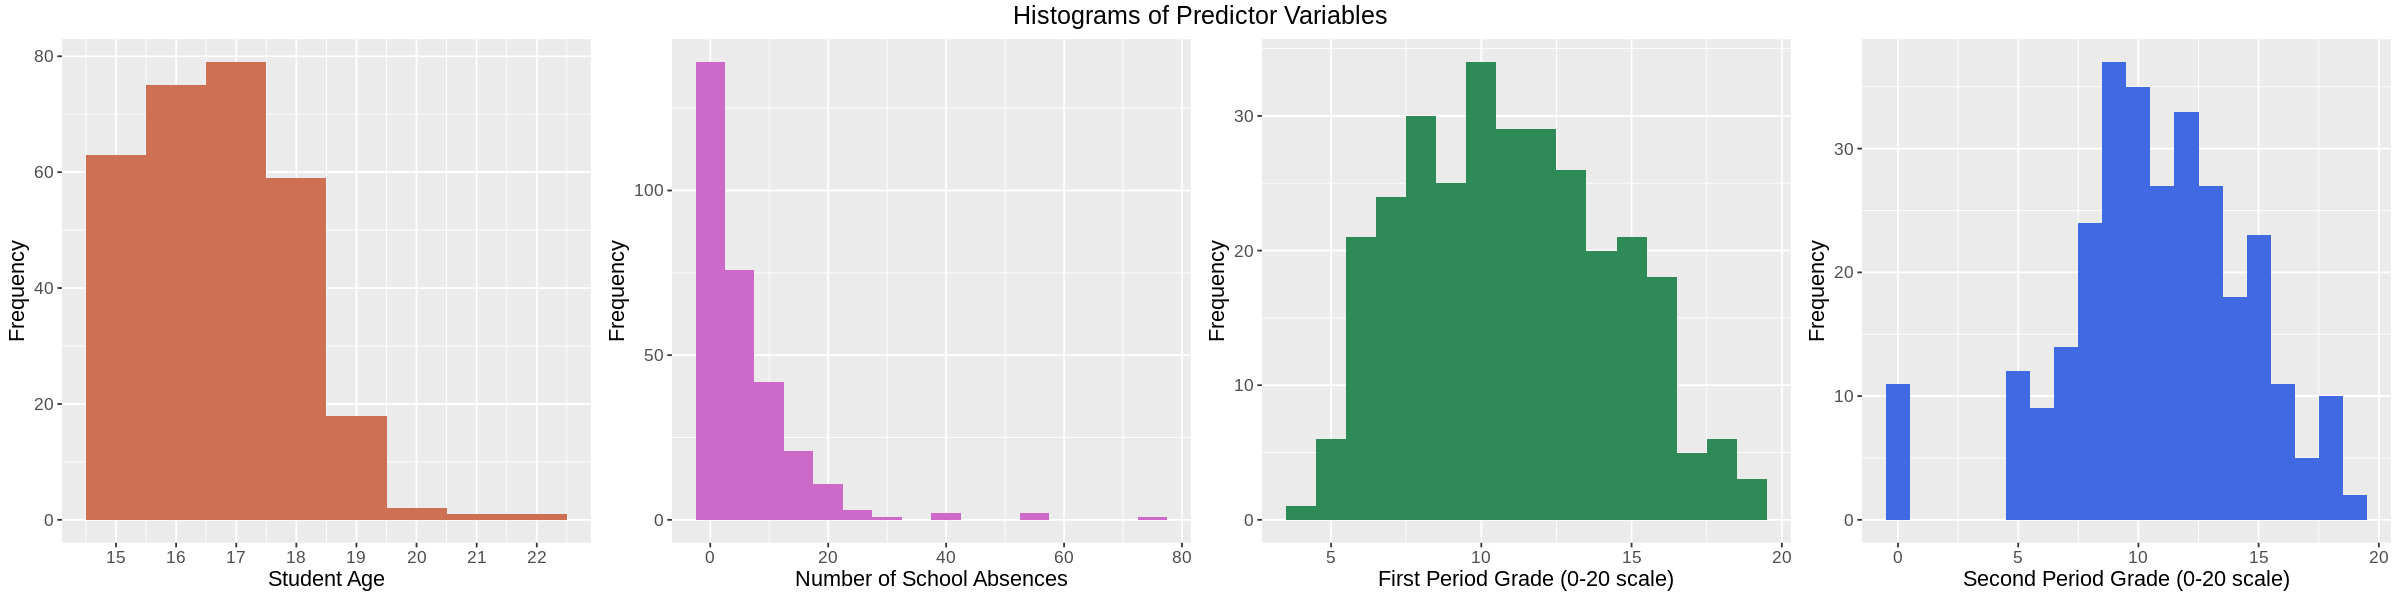

In [8]:
# display scatter plots
library(gridExtra)
require(grid)
options(repr.plot.width = 20, repr.plot.height = 5)
grid.arrange(age_scatter, absences_scatter, G1_scatter, G2_scatter,
             nrow=1,
             top=textGrob("Scatter Plots of Predictor Variables",
                          gp=gpar(fontsize=15,font=10))
            )

# display histograms for predictors
library(gridExtra)
require(grid)
options(repr.plot.width = 20, repr.plot.height = 5)
grid.arrange(age_hist, absences_hist, G1_hist, G2_hist,
             nrow=1,
             top=textGrob("Histograms of Predictor Variables",
                          gp=gpar(fontsize=15,font=8))
            ) 

We now create our linear regression model with four predictor variables. The model is built and fitted on our training set.

In [7]:
# creating linear regression model spec
lm_spec <- linear_reg() %>%
  set_engine("lm") %>%
  set_mode("regression")

# specifying regression formula 
lm_recipe <- recipe(G3 ~ age + absences + G1 + G2, data = training_data)

# creating regression fit object on training set
lm_fit <- workflow() %>%
  add_recipe(lm_recipe) %>%
  add_model(lm_spec) %>%
  fit(data = training_data)
lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age     absences           G1           G2  
     0.4222      -0.1692       0.0372       0.2171       0.9500  


The model output is $$G_3 = 0.4222 - 0.1692age + 0.0372absences +  0.2171G_1 + 0.9500G_2$$

Here we display the coefficients along with their standard errors, test statistics and p-values.

In [8]:
# displaying the coefficients and their statistical properties
coeffs <- tidy(pull_workflow_fit(lm_fit))
coeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.42218574,1.48881010,0.2835726,7.769382e-01
age,-0.16922816,0.08661374,-1.9538257,5.167311e-02
absences,0.03720167,0.01273220,2.9218570,3.750306e-03
G1,0.21709908,0.06245799,3.4759216,5.861516e-04
G2,0.95000895,0.05509174,17.2441254,1.750274e-46


We now use our linear regression model to predict on the test set. We then evaluate our model's predictive ability by calculating the RMSE and $R^2$.

In [9]:
# predicting on test set and obtaining prediction metrics
lm_test_results <- lm_fit %>%
  predict(testing_data) %>%
  bind_cols(testing_data) %>%
  metrics(truth = G3, estimate = .pred)
lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.0490838
rsq,standard,0.7797738
mae,standard,1.2855702


### Discussion

Overall, student's final performance are highly associated with their grade form period 2, with the coefficient of 0.9500. Students are likely to perform better if they have higher grade from period 2. 
Besides, same positive linear relationship can be found between student's final performance and their grade  from period 1, with the coefficient of 0.2171. However, there are two unexpected discoveries. One is student's final performance has little corelation with their attendance. This might be able to be explained by the way courses delivered. For example, some student still can do well in their final if they have watched course recordings, even if they did not attend the courses. Another interesting thing is that there is slightly negative linear relationship between student's final performance and age. Older students might perform not as well as younger students in their final exam. The reason might be that some younger students choose to attend school early than others. 

There are some implications based on these findings. One area is that teachers can refer to student's grade from period 2 as an alarm. For example, If some students did not perform well in period 2, that might imply that students might need help or educators might need to adjust their teaching strategies to help students succeed in the final. Besides, student's early performance can also give some feedback to educational staff about how to organze courses in order to reduce dropour rate. Because the dropout rates and confidence are highly associated with student's early performance at courses, according to the study conducted by Gutman, L. M., Sameroff, A. J., & Cole, R. (2003). If the educator can effectively organze courses to build up student's confidence at the beginning of courses, that might be helpful to reduce dropout rates. 

Some future work could go to predict student's final grade based on student's portuguese grade from period 1 and 2, which might have different linear relationship. Besides, we could also take some other social factors into consideration as to predict student's final grade, such as, family relationship, gender. 

### Reference

Gutman, L. M., Sameroff, A. J., & Cole, R. (2003). Academic growth curve trajectories from 1st grade to 12th grade: Effects of multiple social risk factors and preschool child factors. Developmental Psychology, 39(4), 777–790. https://doi-org.ezproxy.library.ubc.ca/10.1037/0012-1649.39.4.777

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.